In [ ]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mount google drive to google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load data
data = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Flight_Price_Prediction/flight.xlsx')

## Basic Checks

In [ ]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [ ]:
data.shape

(10683, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
data.describe(include='object')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [ ]:
data.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [ ]:
data.duplicated().sum()

220

In [ ]:
# droping 2 duplicate rows

data = data.drop_duplicates()

In [ ]:
# Remove least impactful columns

data = data.drop(['Additional_Info', 'Route'], axis =1)

In [ ]:
data['Airline'].value_counts()

,count
Airline,
Jet Airways,3700
IndiGo,2043
Air India,1695
Multiple carriers,1196
SpiceJet,815
Vistara,478
Air Asia,319
GoAir,194
Multiple carriers Premium economy,13


In [ ]:
data['Source'].value_counts()

,count
Source,
Delhi,4346
Kolkata,2860
Banglore,2179
Mumbai,697
Chennai,381


In [ ]:
data['Total_Stops'].value_counts()

,count
Total_Stops,
1 stop,5625
non-stop,3475
2 stops,1318
3 stops,43
4 stops,1


In [ ]:
# Remove null rows

data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Price,0


In [ ]:
data['Destination'].value_counts()

,count
Destination,
Cochin,4345
Banglore,2860
Delhi,1265
New Delhi,914
Hyderabad,697
Kolkata,381


In [ ]:
# 'New Delhi' and 'Delhi' are same

data['Destination'] = data['Destination'].replace('New Delhi', 'Delhi')

In [ ]:
data['Destination'].value_counts()

,count
Destination,
Cochin,4345
Banglore,2860
Delhi,2179
Hyderabad,697
Kolkata,381


## Exploratory Data Analysis

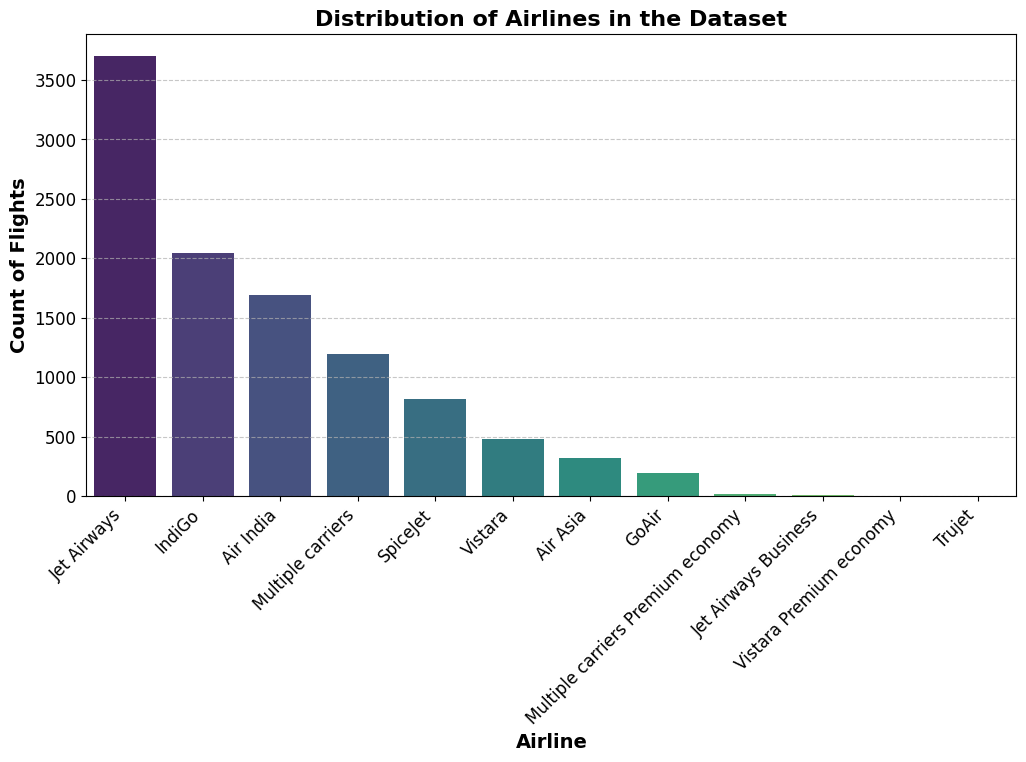

In [ ]:
# Counts of 'Airline'

plt.figure(figsize=(12, 6))  # Adjusted figure size for better visibility
sns.countplot(x='Airline', data=data, palette='viridis', order=data['Airline'].value_counts().index)  # Sorted for better understanding

# Enhancing readability
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotated and aligned x-axis labels
plt.yticks(fontsize=12)  # Increased font size for y-axis
plt.xlabel('Airline', fontsize=14, fontweight='bold')  # Bold axis labels
plt.ylabel('Count of Flights', fontsize=14, fontweight='bold')
plt.title('Distribution of Airlines in the Dataset', fontsize=16, fontweight='bold')  # More descriptive title

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding grid lines for better readability
plt.show()

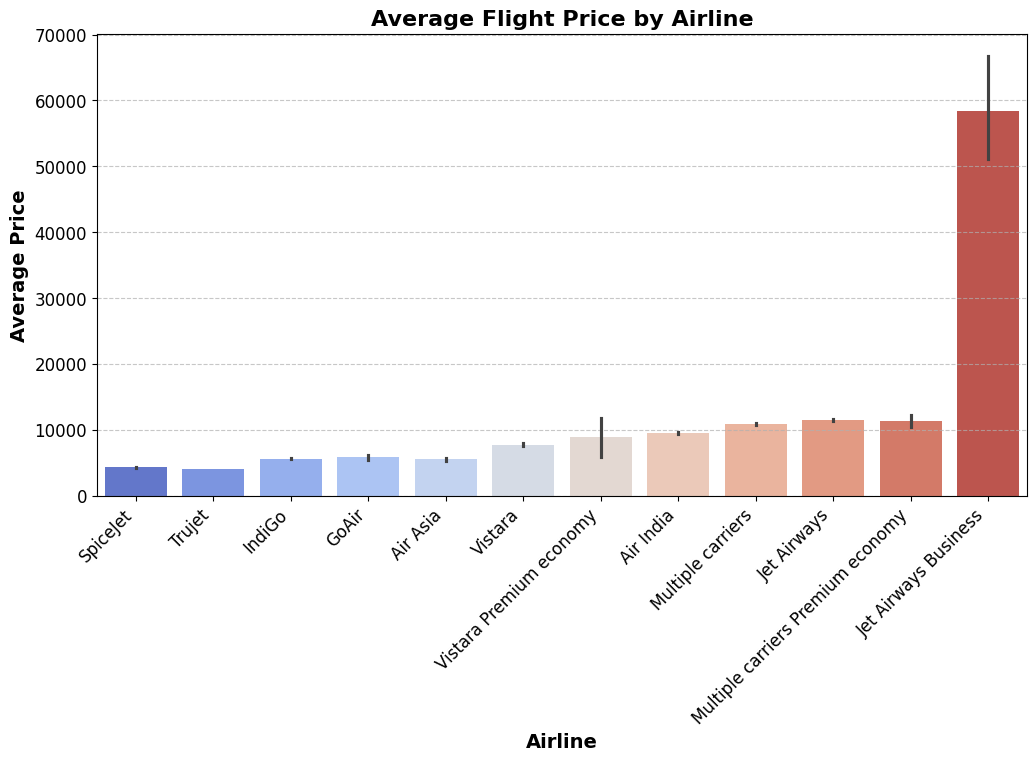

In [ ]:
# 'Airline' VS 'Price'

plt.figure(figsize=(12, 6))  # Adjusted figure size
sns.barplot(
    x='Airline',
    y='Price',
    data=data,
    palette='coolwarm',  # Using a better color palette
    order=data.groupby('Airline')['Price'].median().sort_values().index  # Sorting by median price
)

# Enhancing readability
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotated and aligned x-axis labels
plt.yticks(fontsize=12)  # Increased font size for y-axis
plt.xlabel('Airline', fontsize=14, fontweight='bold')  # Bold axis labels
plt.ylabel('Average Price', fontsize=14, fontweight='bold')
plt.title('Average Flight Price by Airline', fontsize=16, fontweight='bold')  # More descriptive title

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding grid lines for better readability
plt.show()

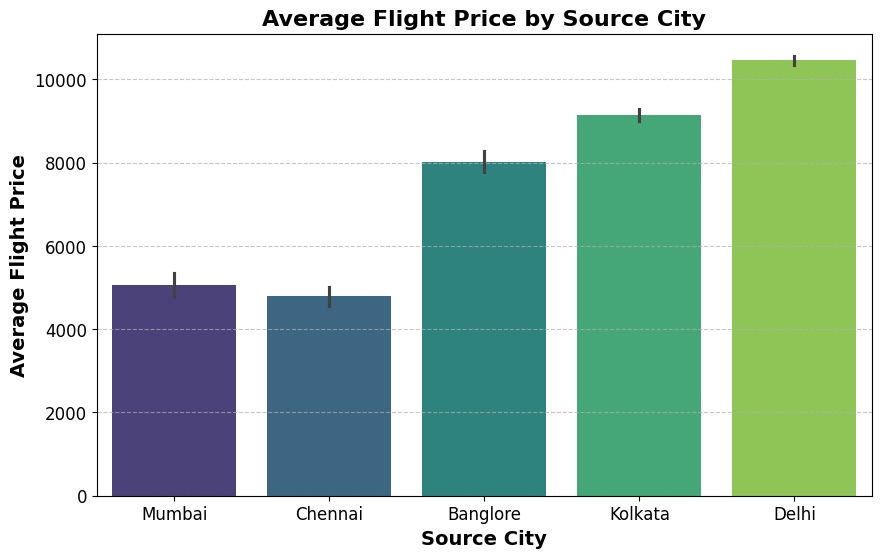

In [ ]:
# 'Source' VS 'Price'

plt.figure(figsize=(10, 6))  # Adjusted figure size

sns.barplot(
    x='Source',
    y='Price',
    data=data,
    palette='viridis',  # Improved color scheme
    order=data.groupby('Source')['Price'].median().sort_values().index  # Sorting by median price
)

# Enhancing readability
plt.xticks(fontsize=12)  # Increased font size for x-axis labels
plt.yticks(fontsize=12)  # Increased font size for y-axis labels
plt.xlabel('Source City', fontsize=14, fontweight='bold')  # Bold axis labels
plt.ylabel('Average Flight Price', fontsize=14, fontweight='bold')
plt.title('Average Flight Price by Source City', fontsize=16, fontweight='bold')  # More descriptive title

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding grid lines for better readability
plt.show()

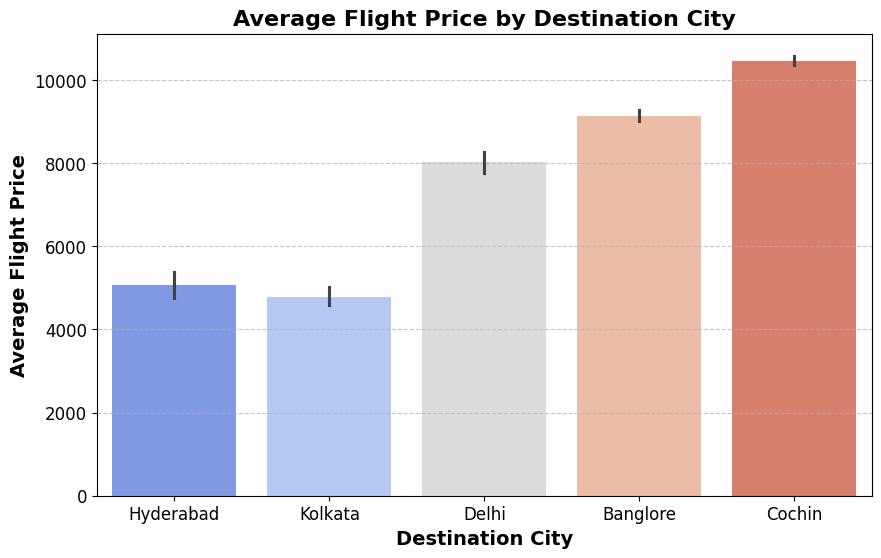

In [ ]:
# 'Destinantion' VS 'Price'

plt.figure(figsize=(10, 6))  # Adjusted figure size

sns.barplot(
    x='Destination',
    y='Price',
    data=data,
    palette='coolwarm',  # Using a modern color palette
    order=data.groupby('Destination')['Price'].median().sort_values().index  # Sorting by median price
)

# Enhancing readability
plt.xticks(fontsize=12)  # Increased font size for x-axis labels
plt.yticks(fontsize=12)  # Increased font size for y-axis labels
plt.xlabel('Destination City', fontsize=14, fontweight='bold')  # Bold axis labels
plt.ylabel('Average Flight Price', fontsize=14, fontweight='bold')
plt.title('Average Flight Price by Destination City', fontsize=16, fontweight='bold')  # Clear title

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding grid lines for better readability
plt.show()

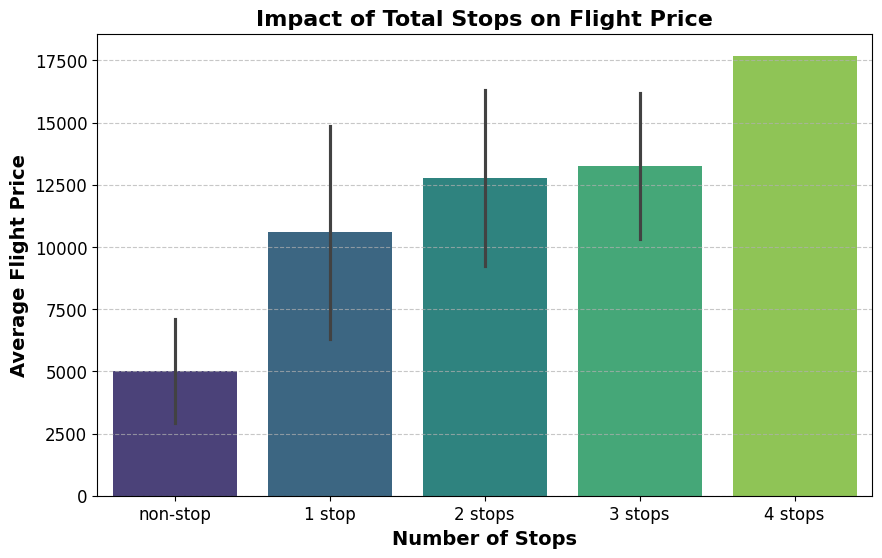

In [ ]:
# 'Total_Stops' VS 'Price'

plt.figure(figsize=(10, 6))  # Adjusted figure size

sns.barplot(
    x='Total_Stops',
    y='Price',
    data=data,
    palette='viridis',  # Using a modern color palette
    order=['non-stop', '1 stop', '2 stops', '3 stops', '4 stops'],  # Ensuring logical order
    ci="sd"  # Adding error bars to show price variations
)

# Enhancing readability
plt.xticks(fontsize=12)  # Increased font size for x-axis labels
plt.yticks(fontsize=12)  # Increased font size for y-axis labels
plt.xlabel('Number of Stops', fontsize=14, fontweight='bold')  # Bold axis labels
plt.ylabel('Average Flight Price', fontsize=14, fontweight='bold')
plt.title('Impact of Total Stops on Flight Price', fontsize=16, fontweight='bold')  # Clear title

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding grid lines for better readability
plt.show()

In [ ]:
# EDA using 'ProfileReport' tool

!pip install ydata-profiling

from ydata_profiling import ProfileReport
profile=ProfileReport(data,title="EDA",explorative=False)
profile

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.5/393.5 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 59.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=e3f8ad917e06daaf35620b421c694f42244d2eb9b051e2e2fd2a0a89bcea4a03
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Preprocessing

In [ ]:
data['Date_of_Journey'].value_counts()

,count
Date_of_Journey,
6/06/2019,490
18/05/2019,486
9/06/2019,485
12/06/2019,483
21/05/2019,482
9/05/2019,466
21/03/2019,412
15/05/2019,402
27/05/2019,369


In [ ]:
# Split Date_of_Journey into day and month but not year because year is same 2019

data['Day'] = pd.to_datetime(data['Date_of_Journey']).dt.day
data['Month'] = pd.to_datetime(data['Date_of_Journey']).dt.month

In [ ]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day,Month
0,IndiGo,24/03/2019,Banglore,Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,12,5
4,IndiGo,01/03/2019,Banglore,Delhi,16:50,21:35,4h 45m,1 stop,13302,1,3


In [ ]:
# Split dep_time and arrival_time into hours and minutes

data['Dep_hour'] = pd.to_datetime(data['Dep_Time']).dt.hour
data['Dep_min'] = pd.to_datetime(data['Dep_Time']).dt.minute
data['Arrival_hour'] = pd.to_datetime(data['Arrival_Time']).dt.hour
data['Arrival_min'] = pd.to_datetime(data['Arrival_Time']).dt.minute

In [ ]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,24/03/2019,Banglore,Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,9,6,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,12,5,18,5,23,30
4,IndiGo,01/03/2019,Banglore,Delhi,16:50,21:35,4h 45m,1 stop,13302,1,3,16,50,21,35


In [ ]:
# Split duration into hour and minutes

import re

# Function to extract hours and minutes from duration string
def extract_duration(duration):
    duration = duration.strip().lower()  # Convert to lowercase and remove spaces

    # Extract hours and minutes using regex
    hours = int(re.search(r'(\d+)h', duration).group(1)) if 'h' in duration else 0
    minutes = int(re.search(r'(\d+)m', duration).group(1)) if 'm' in duration else 0

    return hours, minutes

# Apply function to extract hours and minutes
data[['Duration_hours', 'Duration_minutes']] = data['Duration'].apply(lambda x: pd.Series(extract_duration(x)))

In [ ]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_minutes
0,IndiGo,24/03/2019,Banglore,Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,01/03/2019,Banglore,Delhi,16:50,21:35,4h 45m,1 stop,13302,1,3,16,50,21,35,4,45


In [ ]:
# Removing columns 'Date_of_Journey', 'Dep_Time', 'Arrival_Time' and 'Duration'

data.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration'], axis=1, inplace=True)

In [ ]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price', 'Day',
       'Month', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'Duration_hours', 'Duration_minutes'],
      dtype='object')

In [ ]:
# Apply one hot encoding to Airline, source and destination after this replaces values of total_stops to number

data = pd.get_dummies(data, columns=['Airline', 'Source', 'Destination'], dtype=int)

In [ ]:
data.head()

,Total_Stops,Price,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_minutes,...,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,non-stop,3897,24,3,22,20,1,10,2,50,...,1,0,0,0,0,0,0,1,0,0
1,2 stops,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,1,0,0,0,0
2,2 stops,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,0,1,0,0,0
3,1 stop,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,1,0,0,0,0
4,1 stop,13302,1,3,16,50,21,35,4,45,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
data.columns

Index(['Total_Stops', 'Price', 'Day', 'Month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_minutes',
       'Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata'],
      dtype='object')

In [ ]:
data['Total_Stops'].value_counts()

,count
Total_Stops,
1 stop,5625
non-stop,3475
2 stops,1318
3 stops,43
4 stops,1


In [ ]:
# replacing Total_stops with numeric values (manual encoding)

data['Total_Stops'].replace({'non-stop': 0,'1 stop': 1,'2 stops': 2,'3 stops': 3,'4 stops': 4}, inplace = True)

In [ ]:
data['Total_Stops'].value_counts()

,count
Total_Stops,
1,5625
0,3475
2,1318
3,43
4,1


## Split data

In [ ]:
x = data.drop('Price', axis=1)
y = data['Price']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Standardize data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Model Building

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200,
                              min_samples_split=5,
                              min_samples_leaf=2,
                              max_depth=20,
                              bootstrap=True,
                              random_state=42)

model.fit(x_train_scaled, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=200, random_state=42)

In [ ]:
# Prediction on test data

y_pred = model.predict(x_test_scaled)
y_pred

array([14771.15633135,  3849.23275649,  4360.77250198, ...,
       10995.76017032,  7916.77088366, 12558.33680141])

In [ ]:
# Evaluation of model

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE) : {mse:.2f}")
print(f"R² Score : {r2:.2f}")

Mean Squared Error (MSE) : 3518931.54
R² Score : 0.83


## Prediction

In [ ]:
print("\nEnter the following values for flight price prediction:")

# Feature Columns
input_columns = ['Total_Stops', 'day', 'month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_minutes',
       'Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Banglore_Source', 'Chennai_Source',
       'Delhi_Source', 'Kolkata_Source', 'Mumbai_Source', 'Banglore',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata']

# Available Flight Options
available_flights = [
    'Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
    'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
    'Vistara Premium economy'
]

print("\nAvailable Flights:")
for idx, flight in enumerate(available_flights, 1):
    print(f"{idx}. {flight}")

# Flight Selection
while True:
    try:
        flight_choice = int(input(f"\nEnter the number corresponding to your chosen flight (1-{len(available_flights)}): "))
        if 1 <= flight_choice <= len(available_flights):
            selected_flight = available_flights[flight_choice - 1]
            break
        else:
            print(f"⚠️ Please enter a valid number between 1 and {len(available_flights)}.")
    except ValueError:
        print("⚠️ Invalid input. Please enter a valid number.")

# City Options
available_cities = {
    'Source': ['Banglore_Source', 'Chennai_Source', 'Delhi_Source', 'Kolkata_Source', 'Mumbai_Source'],
    'Destination': ['Banglore', 'Delhi', 'Kolkata', 'Cochin', 'Hyderabad']
}

# Source City Selection
while True:
    source_city = input(f"\nEnter the source city ({', '.join([city.replace('_Source', '') for city in available_cities['Source']])}): ").strip()
    source_city_key = f"{source_city}_Source"
    if source_city_key in available_cities['Source']:
        break
    print("⚠️ Invalid source city. Please choose from the available options.")

# Destination City Selection
while True:
    destination_city = input(f"\nEnter the destination city ({', '.join(available_cities['Destination'])}): ").strip()
    if destination_city in available_cities['Destination']:
        break
    print("⚠️ Invalid destination city. Please choose from the available options.")

# Collecting User Inputs
custom_input = []
for col in input_columns:
    if col == 'Total_Stops':
        value = int(input("Enter number of stops (0, 1, 2, 3, etc.): "))
    elif col == 'day':
        value = int(input("Enter the day of the journey (1 to 31): "))
    elif col == 'month':
        value = int(input("Enter the month of the journey (1 to 12): "))
    elif col == 'Dep_hour':
        value = int(input("Enter departure hour (0 to 23): "))
    elif col == 'Dep_min':
        value = int(input("Enter departure minute (0 to 59): "))
    elif col == 'Arrival_hour':
        value = int(input("Enter arrival hour (0 to 23): "))
    elif col == 'Arrival_min':
        value = int(input("Enter arrival minute (0 to 59): "))
    elif col == 'Duration_hours':
        value = int(input("Enter duration in hours: "))
    elif col == 'Duration_minutes':
        value = int(input("Enter duration in minutes: "))
    elif col == selected_flight:
        value = 1  # One-hot encoding for selected airline
    elif col in available_cities['Source']:
        value = 1 if col == source_city_key else 0  # One-hot encoding for source city
    elif col in available_cities['Destination']:
        value = 1 if col == destination_city else 0  # One-hot encoding for destination city
    else:
        value = 0  # Default for other categorical columns

    custom_input.append(value)

# Reshape input for prediction
custom_input = [custom_input]

# Predict Flight Price
custom_prediction = model.predict(custom_input)

# Display the Prediction
print(f"\n✈️ Predicted Flight Price: ₹{custom_prediction[0]:,.2f}")


Enter the following values for flight price prediction:

Available Flights:
1. Air Asia
2. Air India
3. GoAir
4. IndiGo
5. Jet Airways
6. Jet Airways Business
7. Multiple carriers
8. Multiple carriers Premium economy
9. SpiceJet
10. Trujet
11. Vistara
12. Vistara Premium economy

Enter the number corresponding to your chosen flight (1-12): 6

Enter the source city (Banglore, Chennai, Delhi, Kolkata, Mumbai): Banglore

Enter the destination city (Banglore, Delhi, Kolkata, Cochin, Hyderabad): Delhi
Enter number of stops (0, 1, 2, 3, etc.): 1
Enter the day of the journey (1 to 31): 15
Enter the month of the journey (1 to 12): 3
Enter departure hour (0 to 23): 6
Enter departure minute (0 to 59): 10
Enter arrival hour (0 to 23): 8
Enter arrival minute (0 to 59): 20
Enter duration in hours: 14
Enter duration in minutes: 10

✈️ Predicted Flight Price: ₹7,144.63
